# 채권 & 금리
* ref : https://www.bok.or.kr/portal/bbs/P0000559/view.do?nttId=10063199&menuNo=200690&pageIndex=1
* ref : https://www.ytn.co.kr/_ln/0102_201910301518564398

<img src='./datasets/loan_bonds/news.png'>

1. 금리

2. 채권

채권은 정부, 공공기관, 민간기업 등이 비교적 장기로 불특정 다수로부터 거액의 자금을 조달하기 위하여 정해진 이자와 원금의 지급을 약속하면서 발행하는 증권

채권은 정부가 발행하는 국채, 한국은행이 발행하는 통화안정증권, 지방자치단체가 발행하는 지방채, 상법상의 주식회사가 발행하는 회사채, 금융회사가 발행하는 금융채, 한국전력공사 등 법률에 의해 설립된 법인이 발행하는 특수채 등 다양하게 분류된다. 

채권 유통시장은 장외시장과 장내시장으로 구분된다. 현재 대부분의 채권 거래는 장외시장에서 주로 증권회사의 단순거래를 통하여 이루어지고 있는데, 이는 채권의 종목이 다양하고 거래조건이 표준화되어 있지 않아 한국거래소의 자동매매시스템을 통해 거래하기가 곤란하기 때문이다. 장내시장으로는 한국거래소 내에 일반채권시장과 국채전문유통시장이 개설되어 있다.


채권은 지급이자 변동 여부에 따라 고정금리부채권과 변동금리부채권(FRN; Floating Rate Note)으로 구분된다. 
변동금리부채권은 지급이자율이 시장실세금리에 연동하여 이자지급기간마다 변동되는 채권을 말한다. 변동금리부채권은 금융시장의 불확실성 확대로 금리에 대한 장기예측이 어려울 때 금리변동 위험을 최소화하기 위해 발행된다. 통상 금리 하락기에는 발행자에게 유리하고, 금리 상승기에는 투자자에게 유리한 측면이 있다. 변동금리부채권의 지급이자율은 기준금리에 가산금리를 더하는 방식으로 결정된다. 기준금리는 시장실세금리에 연동하며, 가산금리는 변동금리채 발행자의 신용위험과 기준금리 발행자의 신용위험 차이에 의해 결정된다. 채권발행자는 금리상승 가능성이 높아 고정금리부채권 발행이 어려울 경우 변동금리부채권 발행을 통해 자금을 조달할 수 있고, 단저장고(短低長高)의 수익률곡선 하에서 장기자금을 낮은 단기금리로 조달하는 효과를 얻을 수 있다. 한편, 투자자는 변동금리부채권 투자를 통해 금리변동위험을 회피할 수 있다.


# 기준금리 

In [1]:
import pandas as pd
import numpy as np
import QuantLib as ql
from datetime import date
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings(action='ignore')

# numeric_level = getattr(logging, 'INFO', None)
# logging.basicConfig(level=numeric_level, format='%(asctime)s %(levelname)-8s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

* ECOS내 기준 금리
<pre>
수신금리(신규취급액 기준)  4.2.1.1 신규취급액 기준
수신금리(잔액 기준)        4.2.1.2 잔액 기준
대출금리(신규취급액 기준)  4.2.2.1 신규취급액 기준
대출금리(잔액 기준)       4.2.2.2 잔액 기준
예금은행의 금리수준별 여수신비중(신규취급액 기준) 4.3 예금은행 금리수준별 여수신 비중
고정금리 및 변동금리 대출 비중(신규취급액 기준)  4.4.1 신규취급액 기준
고정금리 및 변동금리 대출 비중(잔액 기준)       4.4.2 잔액 기준
비은행 금융기관별 수신금리(신규취급액 기준) 4.5.1 수신금리(신규취급액 기준)
비은행 금융기관별 대출금리 (신규취급액 기준) 4.5.2 대출금리(신규취급액 기준)
</pre>


NanumGothic


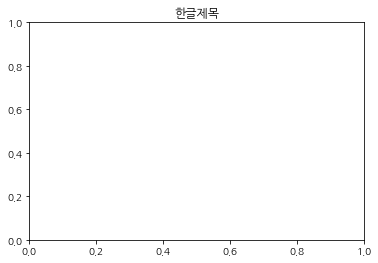

In [2]:
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
plt.title('한글제목')
plt.show()

In [3]:
FILE_PATH = './datasets/loan_bonds/'

In [4]:
df_bir = pd.read_csv(FILE_PATH+"1.1.1_기준금리.csv", sep='\t')
df_bir.head()

,regdate,benchmark_interest_rate,var_rate
0,1999-05-06,4.75,NaN
1,2000-02-10,5.00,0.25
2,2000-10-05,5.25,0.25
3,2001-02-08,5.00,-0.25
4,2001-07-05,4.75,-0.25


In [5]:
df_bir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   regdate                  52 non-null     object 
 1   benchmark_interest_rate  52 non-null     float64
 2   var_rate                 51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [6]:
df_bir['regdate'] = pd.to_datetime(df_bir['regdate'], format='%Y-%m-%d', errors='raise')
# df_ir['regdate'] = pd.to_datetime(df_ir['regdate'])
df_bir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   regdate                  52 non-null     datetime64[ns]
 1   benchmark_interest_rate  52 non-null     float64       
 2   var_rate                 51 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 KB


In [7]:
df_bir = df_bir.set_index('regdate')
df_bir.head()

,benchmark_interest_rate,var_rate
regdate,,
1999-05-06,4.75,NaN
2000-02-10,5.00,0.25
2000-10-05,5.25,0.25
2001-02-08,5.00,-0.25
2001-07-05,4.75,-0.25


In [8]:
df_bir.index[:5]

DatetimeIndex(['1999-05-06', '2000-02-10', '2000-10-05', '2001-02-08',
               '2001-07-05'],
              dtype='datetime64[ns]', name='regdate', freq=None)

In [9]:
df_bir.fillna(0, inplace=True)

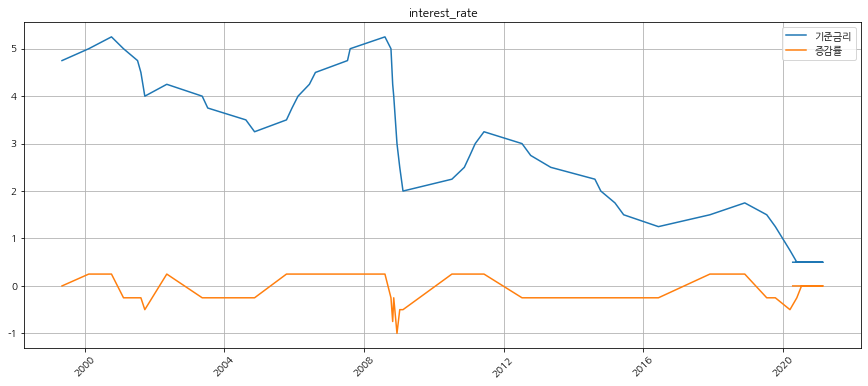

In [10]:
plt.figure(figsize=(15, 6))
plt.title('interest_rate')
plt.plot(df_bir.index, df_bir['benchmark_interest_rate'], label='기준금리')
plt.plot(df_bir.index, df_bir['var_rate'], label='증감률')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# 대출/채권 금리

In [11]:
df = pd.read_csv(FILE_PATH+"1.1.2_ECOS예금국채금리.csv", thousands = ',' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               135 non-null    object 
 1   기준금리             135 non-null    float64
 2   수신금리_신규취급액기준     135 non-null    float64
 3   수신금리_잔액기준        135 non-null    float64
 4   국고채(1년)          135 non-null    float64
 5   국고채(3년)          135 non-null    float64
 6   국고채(5년)          135 non-null    float64
 7   국고채(10년)         135 non-null    float64
 8   대출평균_신규취급액기준     135 non-null    float64
 9   기업대출_신규취급액기준     135 non-null    float64
 10  가계대출_신규취급액기준     135 non-null    float64
 11  공공및기타부문대출_신규취급액  135 non-null    float64
 12  대출평균_잔액기준        135 non-null    float64
 13  기업대출_잔액기준        135 non-null    float64
 14  가계대출_잔액기준        135 non-null    float64
 15  공공기타부문대출_잔액기준    135 non-null    float64
 16  당좌대출_잔액기준        135 non-null    float64
 17  기업_고정금리대출비중     

In [12]:
df['날짜'].unique()

array(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', 

In [13]:
# df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m', errors='raise')
df = df.set_index('날짜')

In [14]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 2010-01 to 2021-03
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준금리             135 non-null    float64
 1   수신금리_신규취급액기준     135 non-null    float64
 2   수신금리_잔액기준        135 non-null    float64
 3   국고채(1년)          135 non-null    float64
 4   국고채(3년)          135 non-null    float64
 5   국고채(5년)          135 non-null    float64
 6   국고채(10년)         135 non-null    float64
 7   대출평균_신규취급액기준     135 non-null    float64
 8   기업대출_신규취급액기준     135 non-null    float64
 9   가계대출_신규취급액기준     135 non-null    float64
 10  공공및기타부문대출_신규취급액  135 non-null    float64
 11  대출평균_잔액기준        135 non-null    float64
 12  기업대출_잔액기준        135 non-null    float64
 13  가계대출_잔액기준        135 non-null    float64
 14  공공기타부문대출_잔액기준    135 non-null    float64
 15  당좌대출_잔액기준        135 non-null    float64
 16  기업_고정금리대출비중      135 non-null    float64
 17  기업_특정금리연동대출

,기준금리,수신금리_신규취급액기준,수신금리_잔액기준,국고채(1년),국고채(3년),국고채(5년),국고채(10년),대출평균_신규취급액기준,기업대출_신규취급액기준,가계대출_신규취급액기준,...,특수채_상장종목수,특수채_상장잔액_백만,특수채_거래량_백만,특수채_거래대금_백만,회사채_상장종목수,회사채_상장잔액_백만,회사채_거래량_백만,회사채_거래대금_백만,외국채_상장종목수,외국채_상장잔액_백만
날짜,,,,,,,,,,,,,,,,,,,,,
2010-01,2.0,3.87,3.20,3.29,4.29,4.84,5.35,5.94,5.92,6.02,...,3109,408412559,1540179,1547280,5003,262215247,647926,662539,2.0,400000.0
2010-02,2.0,3.60,3.18,3.12,4.19,4.76,5.30,5.84,5.83,5.92,...,3125,412569536,883466,892038,4997,262669604,302230,305587,2.0,400000.0
2010-03,2.0,3.27,3.19,2.83,3.94,4.47,4.92,5.69,5.74,5.80,...,3124,426420202,1343913,1360918,4920,262560467,571444,585557,2.0,400000.0
2010-04,2.0,2.89,3.12,2.67,3.77,4.44,4.91,5.49,5.51,5.46,...,3101,428761666,1281001,1295532,4941,262801213,443682,466325,2.0,400000.0
2010-05,2.0,2.89,3.06,2.73,3.70,4.41,4.95,5.40,5.48,5.16,...,3130,434556774,1184827,1189740,4886,263742278,398050,410333,2.0,400000.0


In [15]:
df.fillna(0, inplace=True)
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 2010-01 to 2021-03
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준금리             135 non-null    float64
 1   수신금리_신규취급액기준     135 non-null    float64
 2   수신금리_잔액기준        135 non-null    float64
 3   국고채(1년)          135 non-null    float64
 4   국고채(3년)          135 non-null    float64
 5   국고채(5년)          135 non-null    float64
 6   국고채(10년)         135 non-null    float64
 7   대출평균_신규취급액기준     135 non-null    float64
 8   기업대출_신규취급액기준     135 non-null    float64
 9   가계대출_신규취급액기준     135 non-null    float64
 10  공공및기타부문대출_신규취급액  135 non-null    float64
 11  대출평균_잔액기준        135 non-null    float64
 12  기업대출_잔액기준        135 non-null    float64
 13  가계대출_잔액기준        135 non-null    float64
 14  공공기타부문대출_잔액기준    135 non-null    float64
 15  당좌대출_잔액기준        135 non-null    float64
 16  기업_고정금리대출비중      135 non-null    float64
 17  기업_특정금리연동대출

In [16]:
# gdf = df.groupby([df.index.year, df.index.month]).mean()
gdf = df.groupby([df.index]).mean()

In [17]:
gdf.head(15)

,기준금리,수신금리_신규취급액기준,수신금리_잔액기준,국고채(1년),국고채(3년),국고채(5년),국고채(10년),대출평균_신규취급액기준,기업대출_신규취급액기준,가계대출_신규취급액기준,...,특수채_상장종목수,특수채_상장잔액_백만,특수채_거래량_백만,특수채_거래대금_백만,회사채_상장종목수,회사채_상장잔액_백만,회사채_거래량_백만,회사채_거래대금_백만,외국채_상장종목수,외국채_상장잔액_백만
날짜,,,,,,,,,,,,,,,,,,,,,
2010-01,2.00,3.87,3.20,3.29,4.29,4.84,5.35,5.94,5.92,6.02,...,3109,408412559,1540179,1547280,5003,262215247,647926,662539,2.0,400000.0
2010-02,2.00,3.60,3.18,3.12,4.19,4.76,5.30,5.84,5.83,5.92,...,3125,412569536,883466,892038,4997,262669604,302230,305587,2.0,400000.0
2010-03,2.00,3.27,3.19,2.83,3.94,4.47,4.92,5.69,5.74,5.80,...,3124,426420202,1343913,1360918,4920,262560467,571444,585557,2.0,400000.0
2010-04,2.00,2.89,3.12,2.67,3.77,4.44,4.91,5.49,5.51,5.46,...,3101,428761666,1281001,1295532,4941,262801213,443682,466325,2.0,400000.0
2010-05,2.00,2.89,3.06,2.73,3.70,4.41,4.95,5.40,5.48,5.16,...,3130,434556774,1184827,1189740,4886,263742278,398050,410333,2.0,400000.0
2010-06,2.00,3.00,3.01,2.92,3.75,4.41,4.93,5.32,5.40,5.15,...,3151,446697873,731352,735041,4894,265547342,255475,257354,2.0,400000.0
2010-07,2.25,3.10,3.02,3.14,3.88,4.45,4.91,5.39,5.45,5.13,...,3159,443560940,917964,921187,4925,267628683,340454,346161,2.0,400000.0
2010-08,2.25,3.16,3.03,3.13,3.73,4.27,4.68,5.51,5.57,5.26,...,3195,449954677,1114511,1122284,4912,266810581,338530,343221,2.0,400000.0
2010-09,2.25,3.08,2.98,2.99,3.48,3.91,4.28,5.45,5.51,5.22,...,3216,457477527,1306523,1322566,4914,266519529,461590,465461,2.0,400000.0


In [18]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 2010-01 to 2021-03
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준금리             135 non-null    float64
 1   수신금리_신규취급액기준     135 non-null    float64
 2   수신금리_잔액기준        135 non-null    float64
 3   국고채(1년)          135 non-null    float64
 4   국고채(3년)          135 non-null    float64
 5   국고채(5년)          135 non-null    float64
 6   국고채(10년)         135 non-null    float64
 7   대출평균_신규취급액기준     135 non-null    float64
 8   기업대출_신규취급액기준     135 non-null    float64
 9   가계대출_신규취급액기준     135 non-null    float64
 10  공공및기타부문대출_신규취급액  135 non-null    float64
 11  대출평균_잔액기준        135 non-null    float64
 12  기업대출_잔액기준        135 non-null    float64
 13  가계대출_잔액기준        135 non-null    float64
 14  공공기타부문대출_잔액기준    135 non-null    float64
 15  당좌대출_잔액기준        135 non-null    float64
 16  기업_고정금리대출비중      135 non-null    float64
 17  기업_특정금리연동대출

In [19]:
gdf.index

Index(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10',
       ...
       '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
       '2020-12', '2021-01', '2021-02', '2021-03'],
      dtype='object', name='날짜', length=135)

# 기초 통계 분석

<pre>
 0   기준금리             135 non-null    float64
 
 1   수신금리_신규취급액기준     135 non-null    float64
 2   수신금리_잔액기준        135 non-null    float64
 
 7   대출평균_신규취급액기준     135 non-null    float64
 8   기업대출_신규취급액기준     135 non-null    float64
 9   가계대출_신규취급액기준     135 non-null    float64
 10  공공및기타부문대출_신규취급액  135 non-null    float64
 
 11  대출평균_잔액기준        135 non-null    float64
 12  기업대출_잔액기준        135 non-null    float64
 13  가계대출_잔액기준        135 non-null    float64
 14  공공기타부문대출_잔액기준    135 non-null    float64
 15  당좌대출_잔액기준        135 non-null    float64

## 1. 예금은행 가중평균금리 
* [출처:한은] 신규취급액 기준 통계 : 은행이 해당월중 신규로 취급한 수신 및 대출에 적용한 금리를 신규취급액으로 가중평균한 통계
* [출처:한은] 잔액기준 통계 : 은행이 해당월말 : 현재 보유하고 있는 수신 및 대출에 적용한 금리를 현재 보유잔액으로 가중평균

*  신규취급액기준 가중평균금리  = sum(신규취급금리-신규최급금액) / sum(신규최급금액)
*  잔액기준 가중평균금리  = sum(월말현재적용금리 - 월말현재잔액) / sum(월말현재잔액)

*  잔액기준 금리는 일반적으로 시장금리 변동이 서서히 반영되나,<br> 신규취급액기준 금리는 해당월 중 신규로 조달한 자금을 대상으로 산출됨에 따라 상대적으로 시장금리 변동이 신속히 반영되는 특징이 있음

 
#### (1) 수신금리 : 신규취급액기준, 잔액기준

<Figure size 1440x360 with 0 Axes>

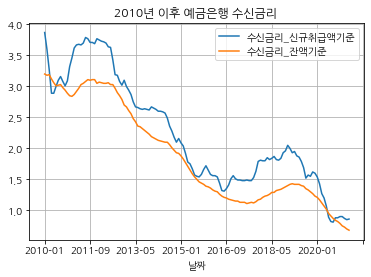

In [20]:
plt.figure(figsize=(20,5))
gdf[['수신금리_신규취급액기준','수신금리_잔액기준']] .plot()
# plt.xticks(gdf.index, rotation=90)
plt.title("2010년 이후 예금은행 수신금리 ")
plt.grid()

In [21]:
gdf[['기준금리','수신금리_신규취급액기준','수신금리_잔액기준']].corr()

,기준금리,수신금리_신규취급액기준,수신금리_잔액기준
기준금리,1.000000,0.944313,0.905811
수신금리_신규취급액기준,0.944313,1.000000,0.972170
수신금리_잔액기준,0.905811,0.972170,1.000000


#### (2) 대출금리 : 대출평균_신규취급액기준, 대출평균_잔액기준

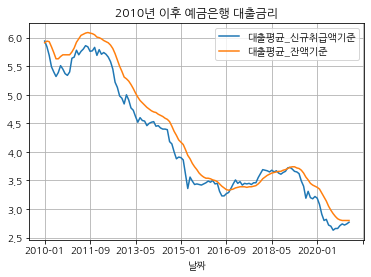

In [22]:
gdf[['대출평균_신규취급액기준','대출평균_잔액기준']].plot()
plt.title("2010년 이후 예금은행 대출금리")
plt.grid()

In [23]:
gdf[['기준금리','대출평균_신규취급액기준','대출평균_잔액기준']].corr()

,기준금리,대출평균_신규취급액기준,대출평균_잔액기준
기준금리,1.000000,0.910125,0.918604
대출평균_신규취급액기준,0.910125,1.000000,0.989751
대출평균_잔액기준,0.918604,0.989751,1.000000


#### (3) 예대마진
* [출처:한은] 예대금리차(예대마진) : 은행이 자금차입자로부터 수취하는 대출금리와 예금자에게 지급하는 예금금리간의 격차로서 은행수익의 본질적 원천                             
* 예대마진 = 대출금리(수입이자/대출금)- 예금금리(지급이자/예수금) 
* > 예금과 대출시장의 경쟁도가 낮을수록, 은행의 위험기피성향이 강할수록, 대출취급에 따른 한계비용이 클수록, 신용위험이 높을수록 확대
* 순이자마진(net interest margin) = 예대업무  + 유가증권투자 수익,비용 --> 광범위한 수익성지표

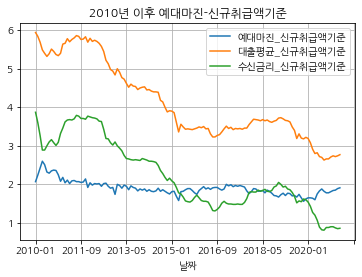

In [24]:

gdf['예대마진_신규취급액기준'] = gdf['대출평균_신규취급액기준'] - gdf['수신금리_신규취급액기준']
gdf[["예대마진_신규취급액기준",'대출평균_신규취급액기준',"수신금리_신규취급액기준"]].plot()
plt.title("2010년 이후 예대마진-신규취급액기준")
plt.grid()  

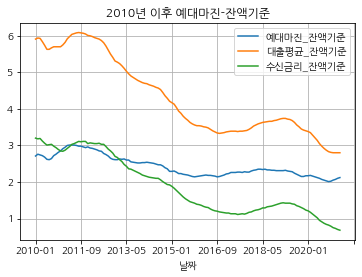

In [25]:
gdf['예대마진_잔액기준'] = gdf['대출평균_잔액기준'] - gdf['수신금리_잔액기준']
gdf[["예대마진_잔액기준",'대출평균_잔액기준',"수신금리_잔액기준"]].plot()
plt.title("2010년 이후 예대마진-잔액기준")
plt.grid()  

In [26]:
gdf[['기준금리','예대마진_신규취급액기준','예대마진_잔액기준']].corr()

,기준금리,예대마진_신규취급액기준,예대마진_잔액기준
기준금리,1.000000,0.420887,0.916749
예대마진_신규취급액기준,0.420887,1.000000,0.631999
예대마진_잔액기준,0.916749,0.631999,1.000000


#### (4) 예대마진_신규취급액기준 vs 기준금리

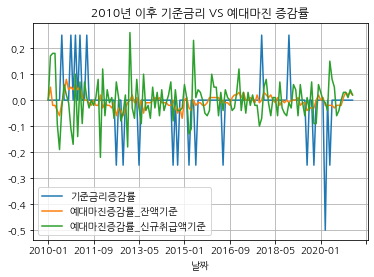

In [27]:
gdf["전달예대마진_잔액기준"] = gdf["예대마진_잔액기준"].shift(1)
gdf["전달예대마진_신규취급액기준"] = gdf['예대마진_신규취급액기준'].shift(1)
gdf["전달기준금리"] = gdf['기준금리'].shift(1)


gdf["예대마진증감률_잔액기준"]      = gdf["예대마진_잔액기준"] - gdf["전달예대마진_잔액기준"]
gdf["예대마진증감률_신규취급액기준"] = gdf["예대마진_신규취급액기준"] - gdf["전달예대마진_신규취급액기준"]
gdf["기준금리증감률"] = gdf["기준금리"] - gdf["전달기준금리"]


gdf["예대마진증감률_잔액기준"].fillna(0, inplace=True)
gdf["예대마진증감률_신규취급액기준"].fillna(0, inplace=True)
gdf["기준금리증감률"].fillna(0, inplace=True)

gdf[['기준금리증감률','예대마진증감률_잔액기준','예대마진증감률_신규취급액기준']].plot()
plt.title("2010년 이후 기준금리 VS 예대마진 증감률")
plt.grid()

In [85]:
bir_cp = df_bir.copy()
bir_cp.index = bir_cp.index.strftime('%Y-%m')
bir_cp = bir_cp.loc['2010-07':,:]

gdf = pd.concat([gdf,bir_cp], axis=1, join='outer')
gdf[['benchmark_interest_rate','var_rate','기준금리','기준금리증감률']].head(10)

,benchmark_interest_rate,benchmark_interest_rate,var_rate,var_rate,기준금리,기준금리증감률
2010-01,NaN,NaN,NaN,NaN,2.00,0.00
2010-02,NaN,NaN,NaN,NaN,2.00,0.00
2010-03,NaN,NaN,NaN,NaN,2.00,0.00
2010-04,NaN,NaN,NaN,NaN,2.00,0.00
2010-05,NaN,NaN,NaN,NaN,2.00,0.00
2010-06,NaN,NaN,NaN,NaN,2.00,0.00
2010-07,2.25,2.25,0.25,0.25,2.25,0.25
2010-08,NaN,NaN,NaN,NaN,2.25,0.00
2010-09,NaN,NaN,NaN,NaN,2.25,0.00
2010-10,NaN,NaN,NaN,NaN,2.25,0.00


In [82]:
gdf['기준금리발표일'] = gdf['benchmark_interest_rate'].apply(lambda x: 0 if np.isnan(x) else 1)   

In [84]:
gdf[['기준금리발표일','benchmark_interest_rate','var_rate','기준금리','기준금리증감률']].head(10)

,기준금리발표일,benchmark_interest_rate,var_rate,기준금리,기준금리증감률
2010-01,0,NaN,NaN,2.00,0.00
2010-02,0,NaN,NaN,2.00,0.00
2010-03,0,NaN,NaN,2.00,0.00
2010-04,0,NaN,NaN,2.00,0.00
2010-05,0,NaN,NaN,2.00,0.00
2010-06,0,NaN,NaN,2.00,0.00
2010-07,1,2.25,0.25,2.25,0.25
2010-08,0,NaN,NaN,2.25,0.00
2010-09,0,NaN,NaN,2.25,0.00
2010-10,0,NaN,NaN,2.25,0.00


In [86]:
gdf.drop(['benchmark_interest_rate','var_rate'], axis=1, inplace=True)
del bir_cp

In [88]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 2010-01 to 2021-03
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준금리             135 non-null    float64
 1   수신금리_신규취급액기준     135 non-null    float64
 2   수신금리_잔액기준        135 non-null    float64
 3   국고채(1년)          135 non-null    float64
 4   국고채(3년)          135 non-null    float64
 5   국고채(5년)          135 non-null    float64
 6   국고채(10년)         135 non-null    float64
 7   대출평균_신규취급액기준     135 non-null    float64
 8   기업대출_신규취급액기준     135 non-null    float64
 9   가계대출_신규취급액기준     135 non-null    float64
 10  공공및기타부문대출_신규취급액  135 non-null    float64
 11  대출평균_잔액기준        135 non-null    float64
 12  기업대출_잔액기준        135 non-null    float64
 13  가계대출_잔액기준        135 non-null    float64
 14  공공기타부문대출_잔액기준    135 non-null    float64
 15  당좌대출_잔액기준        135 non-null    float64
 16  기업_고정금리대출비중      135 non-null    float64
 17  기업_특정금리연동대출

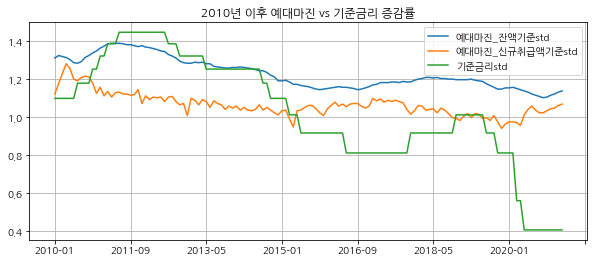

In [96]:
# from sklearn.preprocessing import StandardScaler()
# scaler = StandardScaler()

gdf[["예대마진_잔액기준std",'예대마진_신규취급액기준std','기준금리std']] = np.log1p(gdf[["예대마진_잔액기준",'예대마진_신규취급액기준','기준금리']])
gdf[["예대마진_잔액기준std",'예대마진_신규취급액기준std','기준금리std']].plot(figsize=(10, 4))
plt.title("2010년 이후 예대마진 vs 기준금리 증감률")
plt.grid()

### 기사 관련 시기 

In [98]:
gdfcp = gdf.copy()
gdf = gdf.loc['2019-01':'2020-01']
gdf.head()

,기준금리,수신금리_신규취급액기준,수신금리_잔액기준,국고채(1년),국고채(3년),국고채(5년),국고채(10년),대출평균_신규취급액기준,기업대출_신규취급액기준,가계대출_신규취급액기준,...,전달예대마진_잔액기준,전달예대마진_신규취급액기준,전달기준금리,예대마진증감률_잔액기준,예대마진증감률_신규취급액기준,기준금리증감률,예대마진_잔액기준std,예대마진_신규취급액기준std,기준금리std,기준금리발표일
2019-01,1.75,2.00,1.42,1.733,1.807,1.879,1.991,3.73,3.81,3.58,...,2.31,1.67,1.75,0.000000e+00,0.06,0.0,1.196948,1.004302,1.011601,0
2019-02,1.75,1.93,1.43,1.760,1.802,1.869,1.988,3.70,3.78,3.50,...,2.31,1.73,1.75,4.440892e-16,0.04,0.0,1.196948,1.018847,1.011601,0
2019-03,1.75,1.95,1.42,1.769,1.789,1.838,1.953,3.66,3.71,3.53,...,2.31,1.77,1.75,1.000000e-02,-0.06,0.0,1.199965,0.996949,1.011601,0
2019-04,1.75,1.88,1.42,1.751,1.736,1.771,1.889,3.65,3.71,3.48,...,2.32,1.71,1.75,-2.000000e-02,0.06,0.0,1.193922,1.018847,1.011601,0
2019-05,1.75,1.86,1.42,1.711,1.679,1.716,1.828,3.62,3.67,3.49,...,2.30,1.77,1.75,-1.000000e-02,-0.01,0.0,1.190888,1.015231,1.011601,0


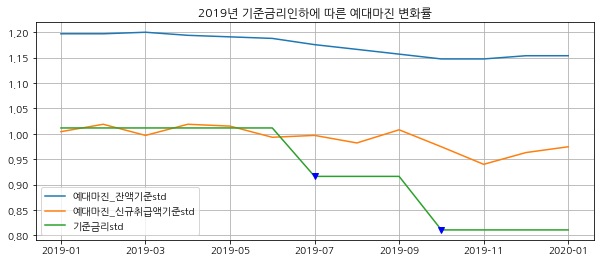

In [104]:
gdf[["예대마진_잔액기준std",'예대마진_신규취급액기준std','기준금리std']].plot(figsize=(10, 4))
for i in range(1, len(gdf)):
    if gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i]> 0:
        plt.plot(i, gdf["기준금리std"].values[i], 'r^')
    elif gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i] < 0:
        plt.plot(i, gdf["기준금리std"].values[i], 'bv')
        
plt.title("2019년 기준금리인하에 따른 예대마진 변화률")
plt.grid()

### 고정금리 및 변동금리 대출 비중

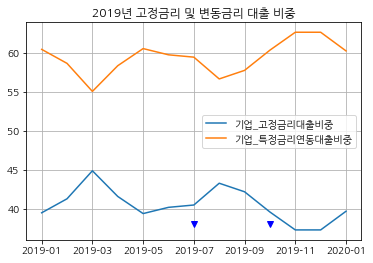

In [116]:
gdf[['기업_고정금리대출비중','기업_특정금리연동대출비중']].plot()
for i in range(1, len(gdf)):
    if gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i]> 0:
        plt.plot(i, 38, 'r^')
    elif gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i] < 0:
        plt.plot(i, 38, 'bv')
        
plt.title("2019년 고정금리 및 변동금리 대출 비중")
plt.grid()  


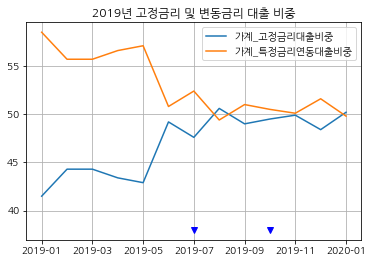

In [117]:
gdf[['가계_고정금리대출비중','가계_특정금리연동대출비중']].plot()
for i in range(1, len(gdf)):
    if gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i]> 0:
        plt.plot(i, 38, 'r^')
    elif gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i] < 0:
        plt.plot(i, 38, 'bv')
        
plt.title("2019년 고정금리 및 변동금리 대출 비중")
plt.grid()  

### 금리 vs 채권 영향도 분석

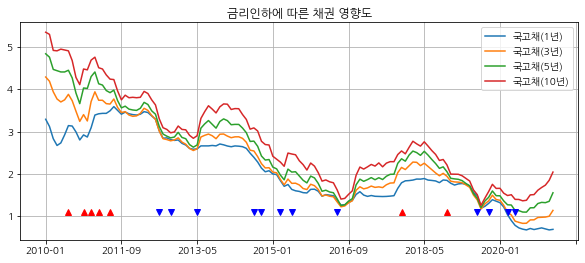

In [127]:
gdfcp[['국고채(1년)','국고채(3년)','국고채(5년)','국고채(10년)']].plot(figsize=(10,4))
for i in range(1, len(gdfcp)):
    if gdfcp["기준금리발표일"].values[i] ==1 and gdfcp["기준금리증감률"].values[i]> 0:
        plt.plot(i, 1.1, 'r^')
    elif gdfcp["기준금리발표일"].values[i] ==1 and gdfcp["기준금리증감률"].values[i] < 0:
        plt.plot(i, 1.1, 'bv')
plt.title("금리인하에 따른 채권 영향도")
plt.grid()  

In [128]:
gdfcp[['기준금리','국고채(1년)','국고채(3년)','국고채(5년)','국고채(10년)']].corr()

,기준금리,국고채(1년),국고채(3년),국고채(5년),국고채(10년)
기준금리,1.000000,0.954417,0.856858,0.791862,0.754643
국고채(1년),0.954417,1.000000,0.967127,0.928858,0.902949
국고채(3년),0.856858,0.967127,1.000000,0.990705,0.977621
국고채(5년),0.791862,0.928858,0.990705,1.000000,0.996081
국고채(10년),0.754643,0.902949,0.977621,0.996081,1.000000


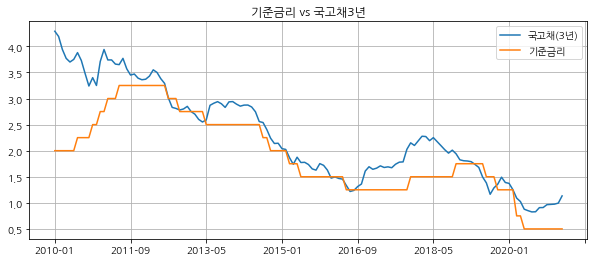

In [130]:
gdfcp[['국고채(3년)','기준금리']].plot(figsize=(10,4))
plt.title("기준금리 vs 국고채3년")
plt.grid()


<font color='red'> 금리인상은 경제활동을 위축시키는 효과</font><br>
* <font color='red'> 수입품 가격 하락으로 수입 증가, 물가는 안정돼</font><br>
* <font color='red'> 가계소비, 기업투자 위축, 원화가치 상승으로 수출 감소</font>

<font color='blue'> 금리인하는 경제를 활성화시키는 효과</font><br>
* <font color='blue'> 가계 소비와 기업 투자 촉진, 원화환율 상승으로 수출 증대</font><br>
* <font color='blue'> 물가상승 압력 증대, 부동산가격 급등, 가계부채 증가 우려</font>

<pre>
* 기준금리를 인하할 경우
이전보다 낮은 금리로 돈을 빌릴 수 있다 --> 싼 자금을 이용해 소비,투자,부동산,주식 등의 투자 늘고 주가 상승 가능성 커진다.
국내외 투자자들은 더 높은 금리를 주는 국가를 찾아 이동하면서 자본이 해외로 유출된다. 
자본유출이 많아질수록 외환수요가 증대되고 환율이 상승하게 된다. --> 원화약세, 달러강세
원화약세 : 국제시장에서 우리나라 상품의 가격 경쟁력이 낮아져 수출상품에 대한 수요가 증가한다.
달러강세 : 수입가격은 비싸져 수입상품에 대한 수요가 줄어든다.
수출증대는 수출기업의 생산,투자,근로자의 임금을 상승시켜 경제전반에 활력을 가져다 준다.

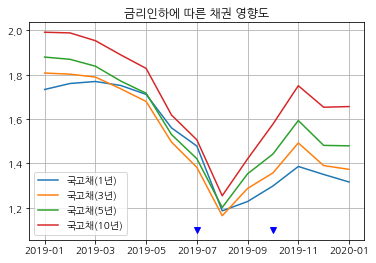

In [129]:
# gdf[['국고채(1년)','국고채(3년)','국고채(5년)','국고채(10년)','국고채권_발행액조','국고채권_잔액조']].plot()
gdf[['국고채(1년)','국고채(3년)','국고채(5년)','국고채(10년)']].plot()
for i in range(1, len(gdf)):
    if gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i]> 0:
        plt.plot(i, 1.1, 'r^')
    elif gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i] < 0:
        plt.plot(i, 1.1, 'bv')
plt.title("금리인하에 따른 채권 영향도")
plt.grid()  

### 채권 종류별 영향도 분석

In [133]:
#  22  국고채권_발행액조        13 non-null     float64
#  23  국고채권_잔액조         13 non-null     float64
#  24  통화안정증권_발행액조      13 non-null     float64
#  25  통화안정증권_잔액조       13 non-null     float64

#  26  국채_상장종목수         13 non-null     int64  
#  27  국채_상장잔액_백만       13 non-null     int64  
#  28  국채_거래량_백만        13 non-null     int64  
#  29  국채_거래대금_백만       13 non-null     int64  

#  30  지방채_상장종목수        13 non-null     int64  
#  31  지방채_상장잔액_백만      13 non-null     int64  
#  32  지방채_거래량_백만       13 non-null     int64  
#  33  거래대금             13 non-null     int64  

#  34  특수채_상장종목수        13 non-null     int64  
#  35  특수채_상장잔액_백만      13 non-null     int64  
#  36  특수채_거래량_백만       13 non-null     int64  
#  37  특수채_거래대금_백만      13 non-null     int64  

#  38  회사채_상장종목수        13 non-null     int64  
#  39  회사채_상장잔액_백만      13 non-null     int64  
#  40  회사채_거래량_백만       13 non-null     int64  
#  41  회사채_거래대금_백만   

# 42  외국채_상장종목수        13 non-null     float64
# 43  외국채_상장잔액_백만      13 non-null     float64
    


<img src='./datasets/loan_bonds/fonds.png' width='600', height='300'>

In [145]:
gdf.iloc[:12][['국채_상장잔액_백만','지방채_상장잔액_백만','특수채_상장잔액_백만','회사채_상장잔액_백만','외국채_상장잔액_백만']]

,국채_상장잔액_백만,지방채_상장잔액_백만,특수채_상장잔액_백만,회사채_상장잔액_백만,외국채_상장잔액_백만
2019-01,653364458,20789819,640195719,419649472,170000.0
2019-02,665255249,20650273,641305321,423276301,170000.0
2019-03,674908627,20622421,641889180,429149756,170000.0
2019-04,685923602,20626919,638514584,435426702,170000.0
2019-05,689298805,20612882,633879654,436936908,170000.0
2019-06,691281567,20701426,634769307,443787073,230000.0
2019-07,693996343,20573689,636568409,448515051,230000.0
2019-08,697072255,20502608,639622367,453680560,230000.0
2019-09,690890847,20485444,641378929,456337524,230000.0
2019-10,696434024,20604824,641908304,463704873,230000.0


In [136]:
gdf[['국고채권_발행액조_비율'] = gdf[['국고채권_발행액조'] /  
gdf[['국고채권_발행액조','국고채권_잔액조','통화안정증권_발행액조','통화안정증권_잔액조']]

,국고채권_발행액조,국고채권_잔액조,통화안정증권_발행액조,통화안정증권_잔액조
2019-01,13.2,579.0,11.8,172.8
2019-02,5.8,584.7,12.1,171.4
2019-03,9.9,584.0,12.3,171.2
2019-04,8.8,591.7,12.4,170.9
2019-05,10.2,600.7,12.5,171.3
2019-06,10.5,599.6,11.9,171.6
2019-07,10.5,607.6,12.9,173.2
2019-08,8.2,613.5,11.7,172.9
2019-09,4.6,607.0,11.4,171.0
2019-10,10.3,614.5,12.0,170.0


         기준금리증감률  국채_거래량_백만_증감률
2010-01      0.0            0.0
2010-02      0.0      8479696.0
2010-03      0.0      7195699.0
2010-04      0.0      1247225.0
2010-05      0.0     -1148641.0


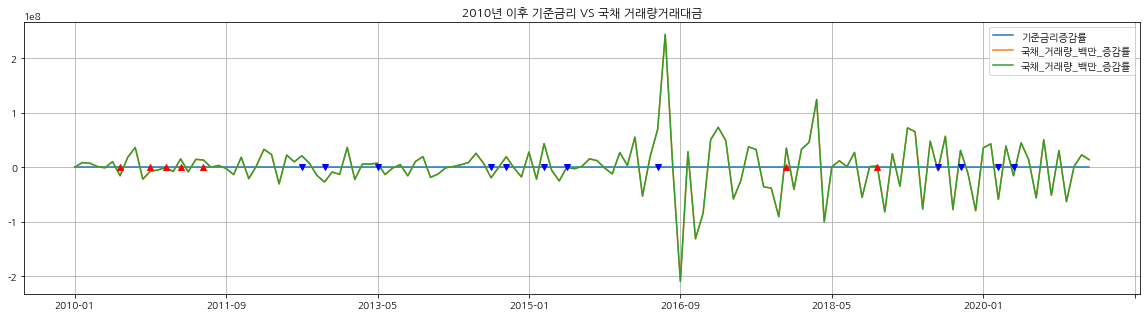

In [167]:
gdfcp["전달국채_거래량_백만"] = gdfcp["국채_거래량_백만"].shift(1)
gdfcp["전달국채_거래대금_백만"] = gdfcp['국채_거래대금_백만'].shift(1)

gdfcp["국채_거래량_백만_증감률"]   = gdfcp["국채_거래량_백만"] - gdfcp["전달국채_거래량_백만"]
gdfcp["국채_거래대금_백만_증감률"] = gdfcp["국채_거래대금_백만"] - gdfcp["전달국채_거래대금_백만"]

gdfcp["국채_거래량_백만_증감률"].fillna(0, inplace=True)
gdfcp["국채_거래대금_백만_증감률"].fillna(0, inplace=True)

print(gdfcp[['기준금리증감률','국채_거래량_백만_증감률']].head())
        
gdfcp[['기준금리증감률','국채_거래량_백만_증감률','국채_거래량_백만_증감률']].plot(figsize=(20,5))
for i in range(1, len(gdfcp)):
    if gdfcp["기준금리발표일"].values[i] ==1 and gdfcp["기준금리증감률"].values[i]> 0:
        plt.plot(i, 1.1, 'r^')
    elif gdfcp["기준금리발표일"].values[i] ==1 and gdfcp["기준금리증감률"].values[i] < 0:
        plt.plot(i, 1.1, 'bv')
plt.title("2010년 이후 기준금리 VS 국채 거래량거래대금")
plt.grid()



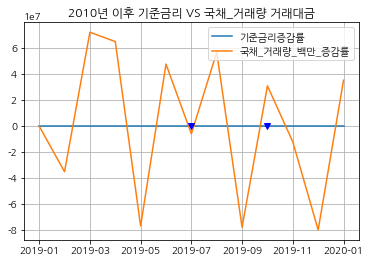

In [169]:
gdf["전달국채_거래량_백만"] = gdf["국채_거래량_백만"].shift(1)
# gdf["전달국채_거래대금_백만"] = gdf['국채_거래대금_백만'].shift(1)

gdf["국채_거래량_백만_증감률"]      = gdf["국채_거래량_백만"] - gdf["전달국채_거래량_백만"]
# gdf["국채_거래대금_백만_증감률"] = gdf["국채_거래대금_백만"] - gdf["전달국채_거래대금_백만"]

gdf["국채_거래량_백만_증감률"].fillna(0, inplace=True)
# gdf["국채_거래대금_백만_증감률"].fillna(0, inplace=True)

        
gdf[['기준금리증감률','국채_거래량_백만_증감률']].plot()
for i in range(1, len(gdf)):
    if gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i]> 0:
        plt.plot(i, 1.1, 'r^')
    elif gdf["기준금리발표일"].values[i] ==1 and gdf["기준금리증감률"].values[i] < 0:
        plt.plot(i, 1.1, 'bv')
plt.title("2010년 이후 기준금리 VS 국채_거래량 거래대금")
plt.grid()




* 네이버증권 : 일별 국채  ref : https://m.stock.naver.com/marketindex/item.nhn?marketindexCd=IRR_GOVT03Y&menu=interest

## 기준금리에 따른 국채금리 변화률 예측
* 시계열 분석 -  공적분 분석(cointegration analysis)
<pre>
두 시계열 사이에 공적분 관계가 있다는 것은, 단기적으로 다를 수도 있지만 장기적으로 보았을 때는 서로 일정한 관계가 있다는 것을 의미한다.
</pre>



<pre>
두 시계열 xt, yt가 공적분 이라고 가정했을 때 yt를 종속변수, xt를 독립변수로 회귀 분석을 하여 만들어지는 잔차 zt에 대해서 다음과 같은 식이 성립한다. 이러한 식을 ECM 식이라고 한다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbkthHh%2FbtqDQs5OCaV%2FvonNoBMIzUxCgJkIWvUGxK%2Fimg.png'>

여기서 et는 회귀 분석으로 만들어진 ECM 형식의 잔차이다.
여기서 zt(yt와 xt를 회귀 분석한 결과)와 et(회귀 분석으로 ECM 형식의 잔차)가 정상 시계열이면 두 시계열이 공적분인지 알 수 있다.
해당 공적분에서 귀무가설과 대립가설은 아래와 같다.
귀무가설 : 공적분 관계가 존재하지 않는다.
대립가설 : 공적분 관계가 존재한다.
즉, p-value를 5%라고 지정했을 때 p-value 값이 0.5 이하이면, 귀무가설을 기각할 수 있기 때문에 대립가설이 채택이 되고 그 말은 공적분 관계가 존재한다라고 말할 수 있다.
</pre>

In [171]:
import statsmodels
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import MinMaxScaler

In [175]:
gdfcp[['기준금리','국고채(1년)','국고채(3년)','국고채(5년)','국고채(10년)']].corr()

,기준금리,국고채(1년),국고채(3년),국고채(5년),국고채(10년)
기준금리,1.000000,0.954417,0.856858,0.791862,0.754643
국고채(1년),0.954417,1.000000,0.967127,0.928858,0.902949
국고채(3년),0.856858,0.967127,1.000000,0.990705,0.977621
국고채(5년),0.791862,0.928858,0.990705,1.000000,0.996081
국고채(10년),0.754643,0.902949,0.977621,0.996081,1.000000


In [176]:
score, p_value, _ = coint(gdfcp['기준금리'],gdfcp['국고채(3년)'])
print('Mean: ' , (gdfcp['기준금리'] / gdfcp['국고채(3년)']).mean())
print('Correlation: ', gdfcp['기준금리'].corr(gdfcp['국고채(3년)']))
print('Cointegration test p-value: ' , p_value)

Mean:  0.8340513968444694
Correlation:  0.8568578986345777
Cointegration test p-value:  0.1715784042057768


## ARIMA(Autoregressive Integrated Moving Average) = 자기회귀모형 + 이동평균모형

* ref : https://dacon.io/en/competitions/official/140472/codeshare/953

* ARIMA의 경우 시계열의 비정상성(Non-stationary)을 설명하기 위해 관측치간의 차분(Diffrance)을 사용한다
* ARIMA 모수 설정 :  p + q < 2,     p * q = 0 
  - AR모형의 Lag을 의미하는 p, 
  - 차분(Diffrence)횟수를 의미하는 d 
  - MA모형의 Lag을 의미하는 q, 



<!-- * AR: 자기회귀(Autoregression) : 이전 관측값의 오차항이 이후 관측값에 영향을 주는 모형이다. 
      AR(1) =   (자기상관계수 * Time lag) + epsilon(white noise)

* I: Intgrated : 누적을 의미하는 것으로, 차분을 이용하는 시계열모형들에 붙이는 표현
* MA: 이동평균(Moving Average) :관측값이 이전의 연속적인 오차항의 영향을 받는다는 모형이다. 
      MA(1) : Xt =  t시점의 오차항 - (이동평균계수 * t-1시점의 오차항)
 -->

<AxesSubplot:>

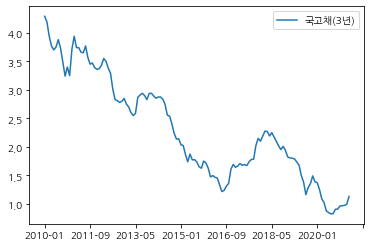

In [207]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


gg = gdfcp[['국고채(3년)']]  #'기준금리',
gg
gg.plot()
# plot_acf(gg)
# plot_pacf(gg)
# plt.show()

* ACF(Autocorrelation function) : Lag에 따른 관측치들 사이의 관련성을 측정하는 함수
   - ACF = Cov(yt, yt+k) / Var(yt)
* PACF(Partial autocorrelation function) : k 이외의 모든 다른 시점 관측치의 영향력을 배제하고  eq_yt와 eq_ytk 두 관측치의 관련성을 측정하는 함수
    - corr(yt, yt-k | yt-1, yt-2... yt-k+1)
    
* 시계열 데이터가 AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소한다.
* 시계열 데이터가 MA의 특성을 띄는 경우, ACF는 급격히 감소하고 PACF는 천천히 감소한다.

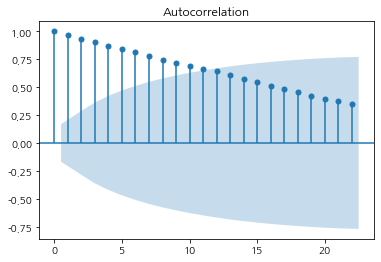

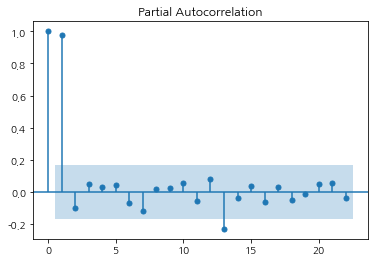

In [208]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(gg)
plot_pacf(gg)
plt.show()

* ACF를 보면 20의 Time lag을 기준으로 자기상관이 양에서 음으로 변동한다. 
* 또한 PACF는 1의 Time lag에서 약 0.9를 보이고 이후에 급격히 감소한다. 따라서 p=0, q=1이 적당하다고 추측할 수 있다.


#### 차분 차수 계산 : 1차 차분 후, ACF 및 PACF 재계산

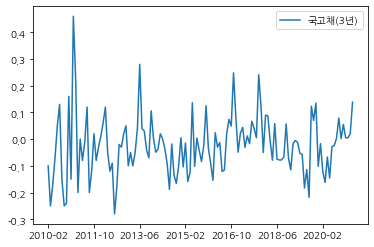

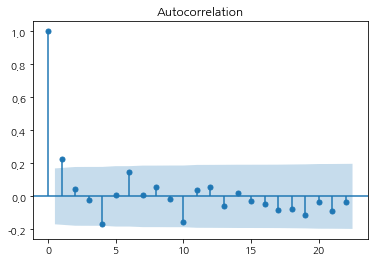

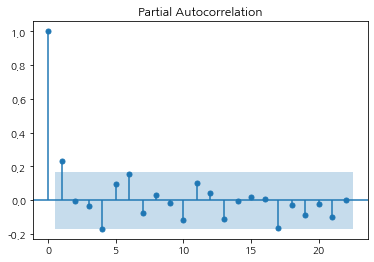

In [209]:
diff_1=gg.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

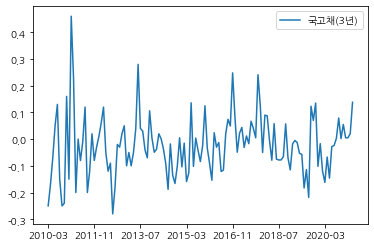

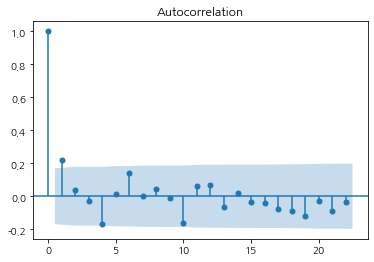

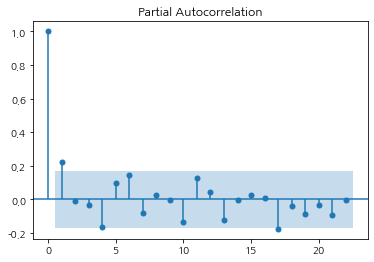

In [210]:
diff_1=gg.diff(periods=1).iloc[2:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

### 모형구축
ARIMA(0,1,1)

In [211]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gg, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.국고채(3년)   No. Observations:                  134
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 107.237
Method:                       css-mle   S.D. of innovations              0.109
Date:                Mon, 17 May 2021   AIC                           -208.474
Time:                        05:56:49   BIC                           -199.781
Sample:                    02-01-2010   HQIC                          -204.941
                         - 03-01-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0234      0.011     -2.036      0.042      -0.046      -0.001
ma.L1.D.국고채(3년)     0.2239      0.083      2.697      0.007       0.061       0.387
                                

c:\it\pythonproject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\it\pythonproject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


 - P>|z|  =  t-test : 학습의 적정성
 - p value 0.05수준에서 보면 MA(1)의 계수는 유효하고, 모형의 Constant는 유효하지 않다

In [212]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(gg, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.국고채(3년)   No. Observations:                  134
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 107.237
Method:                       css-mle   S.D. of innovations              0.109
Date:                Mon, 17 May 2021   AIC                           -208.474
Time:                        05:56:49   BIC                           -199.781
Sample:                    02-01-2010   HQIC                          -204.941
                         - 03-01-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0234      0.011     -2.036      0.042      -0.046      -0.001
ma.L1.D.국고채(3년)     0.2239      0.083      2.697      0.007       0.061       0.387
                                

c:\it\pythonproject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\it\pythonproject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


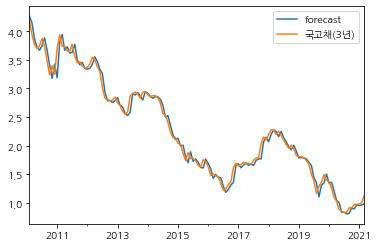

In [213]:
res = model_fit.plot_predict()

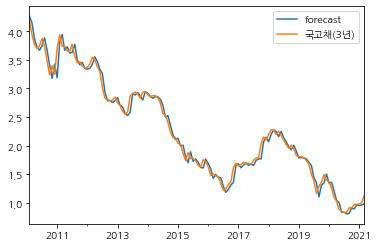

In [214]:
res

In [215]:
fore = model_fit.forecast(steps=1)
print(fore)  #stderr, upper bound, lower bound 

(array([1.14388676]), array([0.10867348]), array([[0.93089065, 1.35688288]]))


In [246]:
# train, test = gdfcp.loc[:'2019-12', :], gdfcp.loc['2019-12':,:]
# # print(test['국고채(3년)'])
# # print(train['국고채(3년)'])



# model = ARIMA(train['국고채(3년)'], order=(0,1,1))
# model_fit = model.fit()  #trend='c',full_output=True, disp=1)

# full_forecast = model_fit.forecast(steps=test['국고채(3년)'].shape[0])
# forecast = pd.DataFrame(full_forecast[0], index=test.index)
# # plt.plot(train.loc['2018-12':,:])
# plt.plot(test)
# plt.plot(forecast)







## RNN

In [347]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(gdfcp['국고채(3년)'], train_size = 0.9, shuffle=False)
print(train.head())
print(test.head())

2010-01    4.29
2010-02    4.19
2010-03    3.94
2010-04    3.77
2010-05    3.70
Name: 국고채(3년), dtype: float64
2020-02    1.253
2020-03    1.091
2020-04    1.024
2020-05    0.878
2020-06    0.850
Name: 국고채(3년), dtype: float64


In [348]:
from sklearn.preprocessing import MinMaxScaler

train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train)
train_trans = scaler.transform(train)
test_trans  = scaler.transform(test)
print(train_trans[:5])
print(test_trans[:5])

[[1.        ]
 [0.96801024]
 [0.88803583]
 [0.83365323]
 [0.8112604 ]]
[[ 0.02847089]
 [-0.02335253]
 [-0.04478567]
 [-0.09149072]
 [-0.10044786]]


In [349]:
def mysplit(sequence, n_steps, n_features, n_predict_steps, test_set=False):
    sequence = np.array(sequence).reshape(-1, n_features)
    X, y = list(), list()
    if test_set:
        start_n = len(sequence) % n_steps 
        finish_n = len(sequence) - n_steps + 1
        for i in range(start_n, finish_n):
            seq_x = sequence[i:i+n_steps]
            X.append(seq_x)
        X = np.array(X)
        X = X.reshape(X.shape[0], n_steps, n_features)
    else:  
        start_n = (len(sequence) + n_predict_steps) % n_steps 
        finish_n = len(sequence) - n_predict_steps - n_steps + 1
        for i in range(start_n, finish_n):
            seq_x, seq_y = sequence[i:i+n_steps], sequence[i+n_steps:i+n_steps+n_predict_steps][:,0]
            X.append(seq_x)
            y.append(seq_y)
        X = np.array(X)
        y = np.array(y)
        X = X.reshape(X.shape[0], n_steps, n_features)
        y = y.reshape(y.shape[0], n_predict_steps)

    return X, y

In [350]:
n_steps = 20
n_features = 1
n_predict_steps = 1


x_train, y_train = mysplit(train_trans, n_steps,n_features, n_predict_steps)
x_test, y_test = mysplit(test_trans, n_steps,n_features, n_predict_steps)

print(x_train[:2])
print(y_train[:2])

[[[0.88803583]
  [0.83365323]
  [0.8112604 ]
  [0.82725528]
  [0.86884197]
  [0.82085733]
  [0.74088292]
  [0.66410749]
  [0.71529111]
  [0.66730646]
  [0.81445937]
  [0.88803583]
  [0.8240563 ]
  [0.8240563 ]
  [0.79846449]
  [0.79526552]
  [0.83365323]
  [0.7696737 ]
  [0.73128599]
  [0.73768394]]

 [[0.83365323]
  [0.8112604 ]
  [0.82725528]
  [0.86884197]
  [0.82085733]
  [0.74088292]
  [0.66410749]
  [0.71529111]
  [0.66730646]
  [0.81445937]
  [0.88803583]
  [0.8240563 ]
  [0.8240563 ]
  [0.79846449]
  [0.79526552]
  [0.83365323]
  [0.7696737 ]
  [0.73128599]
  [0.73768394]
  [0.71209213]]]
[[0.71209213]
 [0.7024952 ]]


In [351]:
pd.DataFrame(x_train.reshape(x_train.shape[1],x_train.shape[0]),
             index = [f'day{x+1}' for x in range(x_train.shape[1])],
             columns = [f'input_{x+1}' for x in range(x_train.shape[0])])

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,...,input_90,input_91,input_92,input_93,input_94,input_95,input_96,input_97,input_98,input_99
day1,0.888036,0.833653,0.811260,0.827255,0.868842,0.820857,0.740883,0.664107,0.715291,0.667306,...,0.824056,0.798464,0.795266,0.833653,0.769674,0.731286,0.737684,0.712092,0.702495,0.705694
day2,0.724888,0.820857,0.740883,0.664107,0.715291,0.667306,0.814459,0.888036,0.824056,0.824056,...,0.769674,0.731286,0.737684,0.712092,0.702495,0.705694,0.724888,0.763276,0.747281,0.708893
day3,0.680102,0.590531,0.814459,0.888036,0.824056,0.824056,0.798464,0.795266,0.833653,0.769674,...,0.702495,0.705694,0.724888,0.763276,0.747281,0.708893,0.680102,0.590531,0.532949,0.526552
day4,0.516955,0.523353,0.539347,0.795266,0.833653,0.769674,0.731286,0.737684,0.712092,0.702495,...,0.747281,0.708893,0.680102,0.590531,0.532949,0.526552,0.516955,0.523353,0.539347,0.507358
day5,0.491363,0.459373,0.443378,0.456174,0.712092,0.702495,0.705694,0.724888,0.763276,0.747281,...,0.532949,0.526552,0.516955,0.523353,0.539347,0.507358,0.491363,0.459373,0.443378,0.456174
day6,0.545745,0.558541,0.568138,0.555342,0.532949,0.747281,0.708893,0.680102,0.590531,0.532949,...,0.539347,0.507358,0.491363,0.459373,0.443378,0.456174,0.545745,0.558541,0.568138,0.555342
day7,0.532949,0.566859,0.568458,0.552783,0.540627,0.547025,0.526552,0.516955,0.523353,0.539347,...,0.443378,0.456174,0.545745,0.558541,0.568138,0.555342,0.532949,0.566859,0.568458,0.552783
day8,0.540627,0.547025,0.547345,0.535509,0.506078,0.445937,0.440179,0.491363,0.459373,0.443378,...,0.568138,0.555342,0.532949,0.566859,0.568458,0.552783,0.540627,0.547025,0.547345,0.535509
day9,0.506078,0.445937,0.440179,0.396993,0.343890,0.311580,0.313180,0.279910,0.558541,0.568138,...,0.568458,0.552783,0.540627,0.547025,0.547345,0.535509,0.506078,0.445937,0.440179,0.396993
day10,0.343890,0.311580,0.313180,0.279910,0.275112,0.224248,0.183941,0.227447,0.194818,0.568458,...,0.547345,0.535509,0.506078,0.445937,0.440179,0.396993,0.343890,0.311580,0.313180,0.279910


In [305]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.preprocessing.sequence import pad_sequences

In [363]:
def mymodel(stateful,batch_size, n_steps, n_features):
    model = Sequential()
    model.add(LSTM(16,
                   batch_input_shape=(batch_size, n_steps, n_features),
                   stateful=stateful
                   ))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

batch_size = 1
epochs = 11


# x, y = mysplit(scaler.transform(np.array(gdf['국고채(3년)']).reshape(-1,1)), n_steps, n_features, n_predict_steps)
# y = scaler.inverse_transform(y)


In [364]:
X = scaler.transform(np.array(gdfcp['국고채(3년)']).reshape(-1,1))
x, y = mysplit(X, n_steps,n_features, n_predict_steps)
print(x[:2])
print(y[:2])


[[[0.79846449]
  [0.79526552]
  [0.83365323]
  [0.7696737 ]
  [0.73128599]
  [0.73768394]
  [0.71209213]
  [0.7024952 ]
  [0.70569418]
  [0.72488804]
  [0.76327575]
  [0.74728087]
  [0.70889315]
  [0.68010237]
  [0.59053103]
  [0.53294946]
  [0.5265515 ]
  [0.51695457]
  [0.52335253]
  [0.53934741]]

 [[0.79526552]
  [0.83365323]
  [0.7696737 ]
  [0.73128599]
  [0.73768394]
  [0.71209213]
  [0.7024952 ]
  [0.70569418]
  [0.72488804]
  [0.76327575]
  [0.74728087]
  [0.70889315]
  [0.68010237]
  [0.59053103]
  [0.53294946]
  [0.5265515 ]
  [0.51695457]
  [0.52335253]
  [0.53934741]
  [0.50735765]]]
[[0.50735765]
 [0.49136276]]


In [365]:
model = mymodel(True, batch_size, n_steps, n_features)

# for i in range(epochs): 
#     print('Epoch', i + 1, '/', epochs)
res = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=20,
                  verbose=1,
                  shuffle=False,
                  validation_data=(x_test, y_test)
                   )


Epoch 1/20
99/99 [==============================] - 2s 4ms/step - loss: 0.3233 - mse: 0.3233
Epoch 2/20
99/99 [==============================] - 0s 5ms/step - loss: 0.0335 - mse: 0.0335
Epoch 3/20
99/99 [==============================] - 0s 4ms/step - loss: 0.0301 - mse: 0.0301
Epoch 4/20
99/99 [==============================] - 0s 3ms/step - loss: 0.0247 - mse: 0.0247
Epoch 5/20
99/99 [==============================] - 0s 4ms/step - loss: 0.0198 - mse: 0.0198
Epoch 6/20
99/99 [==============================] - 0s 3ms/step - loss: 0.0160 - mse: 0.0160
Epoch 7/20
99/99 [==============================] - 0s 3ms/step - loss: 0.0131 - mse: 0.0131
Epoch 8/20
99/99 [==============================] - 0s 3ms/step - loss: 0.0110 - mse: 0.0110
Epoch 9/20
99/99 [==============================] - 0s 3ms/step - loss: 0.0095 - mse: 0.0095
Epoch 10/20
99/99 [==============================] - 0s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 11/20
99/99 [==============================] - 0s 3ms/step - lo